<a href="https://colab.research.google.com/github/pachterlab/GP_2021_2/blob/main/gg210110_dag_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
_=np.seterr(divide='ignore')

In [2]:
!wget -O dag_cme_burst.py https://raw.githubusercontent.com/pachterlab/GP_2021_2/main/dag_cme_burst.py

--2021-05-27 01:53:38--  https://raw.githubusercontent.com/pachterlab/GP_2021_2/main/dag_cme_burst.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6631 (6.5K) [text/plain]
Saving to: ‘dag_cme_burst.py’

dag_cme_burst.py    100%[===================>]   6.48K  --.-KB/s    in 0s      

2021-05-27 01:53:38 (72.8 MB/s) - ‘dag_cme_burst.py’ saved [6631/6631]



In [3]:
from dag_cme_burst import *

In [5]:
#a e s t h e t i c s
col_hist = [0.7]*3
col_theory = [1,0,0]
w_theory = 1.5
fontsize = 12

In [6]:
nnod = 7
nedg = 11
seed = 1
G=random_dag(nnod,nedg,seed)
nedg = len(G.edges())

In [8]:
G.edges()

OutEdgeView([(0, 3), (1, 6), (1, 5), (1, 2), (3, 2), (3, 4), (5, 0), (5, 6), (5, 2), (5, 4), (6, 4)])

In [ ]:
np.random.seed(837)
n_deg = 3

In [ ]:
nrxn = nedg+1+n_deg

In [ ]:
S = construct_S(nrxn,nnod,G,n_deg)

In [ ]:
S

array([[-5.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  1.,  0.,  0.,  0.],
       [-1.,  0.,  1.,  0.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  0.,  0.,  1.,  0.],
       [-1.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  1., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  0.,  1.,  0.,  0., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  1., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  1.],
       [ 0.,  0.,  0.,  0.,  1.,  0., -1.],
       [ 0., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  0.,  0.]])

In [ ]:
k = 10**(np.random.rand(nrxn)-0.5)

In [ ]:
bs = 10

In [ ]:
S[0,0]=bs

In [ ]:
nCells = 10000
T = 5
measure_time = T/min(k)
tvec = np.linspace(0,measure_time,2,endpoint=True)
t_matrix = np.matlib.repmat(tvec,nCells,1)
X=gillvec(k,t_matrix,S,nCells)
X = X[:,-1,:]

In [ ]:
CV = np.zeros((nnod,nnod))
for i in range(nnod):
    for j in range(nnod):
        CV[i,j] = compute_cov(S,k,i,j)
cov_exp = np.cov(X.T)

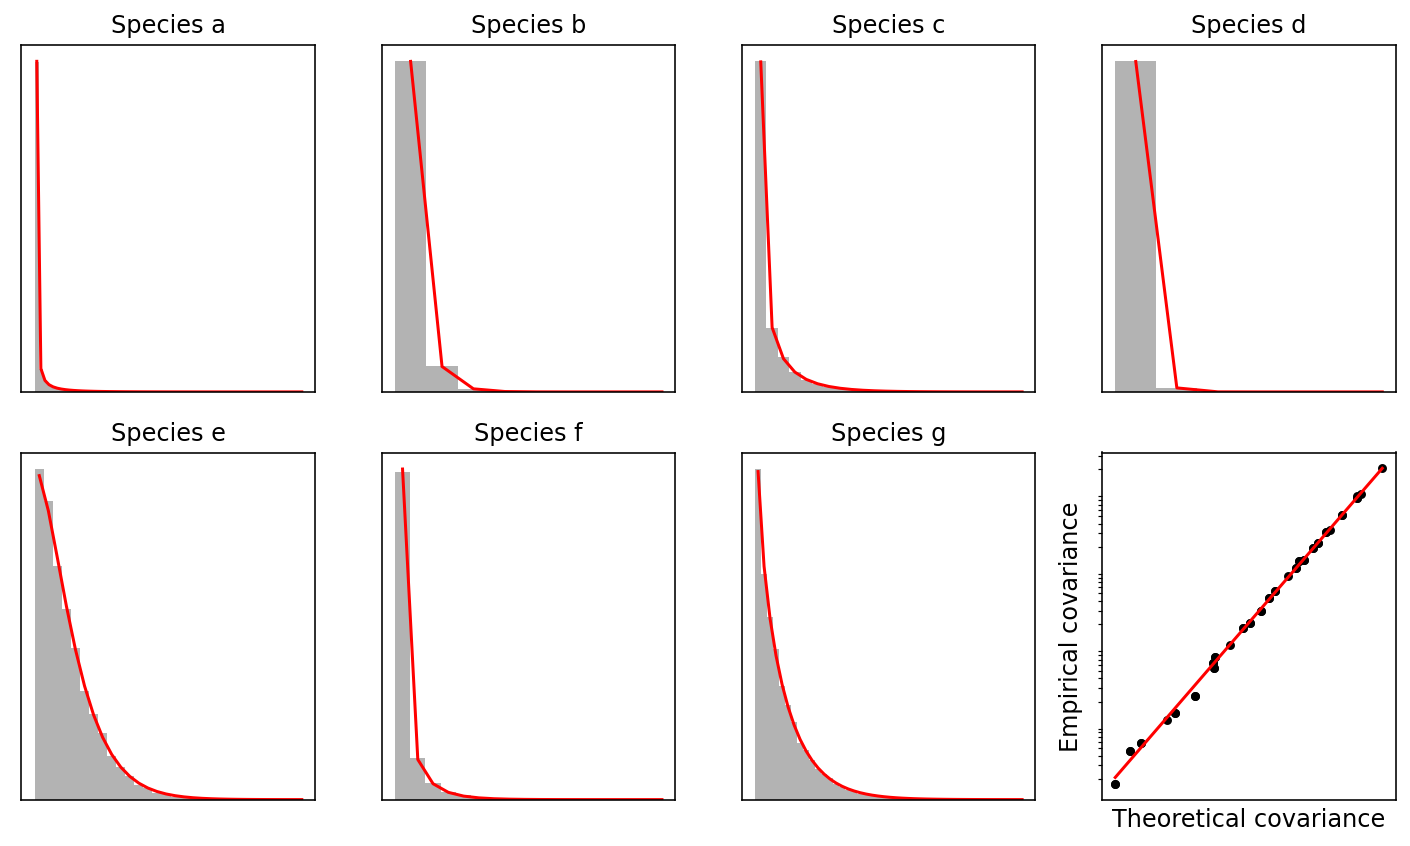

In [ ]:
nr = 2
nc = 4  
fig1,ax1=plt.subplots(nrows=nr,ncols=nc,figsize=(10,6))
mx = np.amax(X,0)+5

            
for i in range(nnod):
    ax_loc = np.unravel_index(i,[nr,nc])
    x = np.arange(0,mx[i],dtype=np.int32)
    bins_ = x-0.5
    ax1[ax_loc].hist(X[:,i],bins=bins_, density=True,color=col_hist)
    bnd = np.ones(nnod,dtype=np.int32)
    bnd[i] = x[-1]+1
    # print(bnd)
    P = np.squeeze(cme_integrator(k,bnd,S,np.inf))
    ax1[ax_loc].plot(x,P,color=col_theory, linewidth=w_theory)
    ax1[ax_loc].set_xticks([])
    ax1[ax_loc].set_yticks([])
    
    ax1[ax_loc].set_title('Species '+chr(i+97),fontsize=fontsize)

ax_loc=np.unravel_index(7,[nr,nc])
xr = [np.min(CV),np.max(CV)]
ax1[ax_loc].plot(xr,xr,color=col_theory,linewidth=w_theory)
ax1[ax_loc].scatter(CV.flatten(),cov_exp.flatten(),c='k',s=12)
ax1[ax_loc].set_xscale('log')
ax1[ax_loc].set_yscale('log')
ax1[ax_loc].set_xticks([])
ax1[ax_loc].set_yticks([])
ax1[ax_loc].set_xlabel('Theoretical covariance',fontsize=fontsize)
ax1[ax_loc].set_ylabel('Empirical covariance',fontsize=fontsize)




fig1.tight_layout()
plt.savefig('hist_corr_fig.png',dpi=450)

In [ ]:
np.round(k[0],2)

0.44

In [ ]:
np.round(k[1:-3],2)

array([0.48, 2.12, 1.31, 2.21, 1.16, 2.41, 0.4 , 1.19, 0.37, 1.19, 0.53])

In [ ]:
np.round(k[-3:],2)

array([0.94, 2.38, 0.72])